In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Dataset

In [3]:
cars = pd.read_csv(r"C:\Users\moran\Desktop\Datasets\cars.csv")

In [4]:
cars = cars.loc[cars.MPG > 0, ]

### Separating the Predictor and the Target

In [5]:
#Predictors
X = cars[['Cylinders', 'Displacement', 'Horsepower', 'Weight']]

In [6]:
X.head()

,Cylinders,Displacement,Horsepower,Weight
0,8,307.0,130,3504
1,8,350.0,165,3693
2,8,318.0,150,3436
3,8,304.0,150,3433
4,8,302.0,140,3449


In [7]:
#Target
y = cars.MPG

### Standardized (Scaled) Predictors

Standardization: Bring the variables into a same scale where the mean of all variables are equal to 0 and the standard deviation is 1

(X - mean(X))/Std(X)

In [8]:
def standardize(x):
    return((x - np.mean(x))/np.std(x))

In [9]:
standardize(cars.Weight).var()

1.0025188916876568

In [10]:
#Apply function help us to apply a function to all the columns in the data
#here x represents a column (array)
X_scaled = X.apply(lambda x: (x - np.mean(x)) / np.std(x))

In [11]:
X_scaled.head()

,Cylinders,Displacement,Horsepower,Weight
0,1.498191,1.090604,0.673950,0.630870
1,1.498191,1.503514,1.544187,0.854333
2,1.498191,1.196232,1.171228,0.550470
3,1.498191,1.061796,1.171228,0.546923
4,1.498191,1.042591,0.922589,0.565841


In [12]:
X_scaled.mean()

Cylinders      -7.671139e-16
Displacement   -1.205066e-16
Horsepower     -7.420084e-17
Weight         -1.394753e-17
dtype: float64

In [13]:
X.mean()

Cylinders          5.454774
Displacement     193.425879
Horsepower       102.894472
Weight          2970.424623
dtype: float64

In [14]:
X_scaled.var()

Cylinders       1.002519
Displacement    1.002519
Horsepower      1.002519
Weight          1.002519
dtype: float64

### Train-Validation-Test Split

In [15]:
#Function test-train split
from sklearn.model_selection import train_test_split

In [16]:
(X_train, X_test, y_train, y_test) = train_test_split(X_scaled, y, test_size = 0.2)

In [17]:
print(len(X_train), len(X_test))

318 80


In [18]:
(X_train, X_valid, y_train, y_valid) = train_test_split(X_train, y_train, test_size = 0.25)

In [19]:
print(len(X_train), len(X_valid))

238 80


### Fitting a KNN Regressor

In [20]:
from sklearn.neighbors import KNeighborsRegressor

In [21]:
# Step-1: instantiate learning model (k = 3)
knn = KNeighborsRegressor(n_neighbors=3, metric='euclidean') # 3-NN using euclidean distance

# Step-2: fitting the model
knn.fit(X_train, y_train)

KNeighborsRegressor(metric='euclidean', n_neighbors=3)

### Prediction

In [22]:
#Make prediction on the test data
predicted_values = knn.predict(X_test)

In [23]:
#predicted values of all the obs in the test data based on 3-NN model
predicted_values

array([35.73333333, 14.5       , 27.        , 22.        , 29.        ,
       33.96666667, 23.        , 19.53333333, 26.33333333, 26.        ,
       19.        , 25.63333333, 24.63333333, 33.66666667, 25.83333333,
       35.83333333, 31.16666667, 24.66666667, 35.76666667, 31.1       ,
       14.        , 32.03333333, 28.5       , 22.13333333, 32.7       ,
       35.36666667, 27.66666667, 25.16666667, 15.66666667, 31.66666667,
       21.33333333, 32.76666667, 36.43333333, 10.33333333, 22.13333333,
       18.8       , 35.76666667, 28.33333333, 12.66666667, 28.33333333,
       26.63333333, 19.33333333, 27.4       , 36.43333333, 15.        ,
       23.23333333, 24.96666667, 35.66666667, 32.66666667, 29.06666667,
       15.66666667, 21.33333333, 19.        , 17.03333333, 16.33333333,
       19.53333333, 25.76666667, 35.66666667, 27.66666667, 19.66666667,
       25.        , 32.5       , 17.        , 13.16666667, 25.16666667,
       21.66666667, 18.56666667, 14.5       , 14.66666667, 25.3 

        For each observation in the test data:
            search k nearest neighbours from the training data
            predicted value = mean(y of the k nearest neighbours)

On average, the results of the predictions done by the model is (plus or minus) 3.18 off the actual value.

### Accuracy Checks

In [24]:
# MAE (Mean Absolute Error)
np.mean(np.abs(y_test - predicted_values))

3.2841666666666662

In [25]:
# MSE (Mean Squared Error)
np.mean((y_test - predicted_values)**2)

17.787138888888887

In [26]:
# RMSE (Root Mean Squared Error)
np.sqrt(np.mean((y_test - predicted_values)**2))

4.217480158683487

In [27]:
# MAPE (Mean Absolute Percentage Error)
np.mean(np.abs(y_test - predicted_values)/y_test)*100

13.433245956214208

### Choosing best k

In [28]:
neighbour = np.arange(1,51)
mad = []

for k in neighbour:
    knn = KNeighborsRegressor(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    predicted_values = knn.predict(X_valid)
    mad.append(np.mean(np.abs(y_valid - predicted_values)))

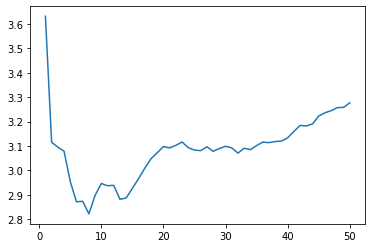

In [29]:
plt.plot(neighbour, np.array(mad))
plt.show()

In [30]:
mad[14:25]

[2.9266666666666667,
 2.9662499999999987,
 3.0091911764705883,
 3.0476388888888892,
 3.072236842105263,
 3.0976249999999985,
 3.092142857142858,
 3.1025000000000005,
 3.1164130434782606,
 3.0930208333333327,
 3.083]

In [31]:
k_selected = [4, 9, 11, 22]

In [32]:
mad = []

for k in k_selected:
    knn = KNeighborsRegressor(n_neighbors=k, metric="euclidean")
    knn.fit(X_train, y_train)
    predicted_values = knn.predict(X_test)
    mad.append(np.mean(np.abs(y_test - predicted_values)))

In [33]:
mad

[3.1812499999999995, 2.786111111111111, 2.7002272727272723, 2.7452840909090908]